# Titanic

### Dataset Information 
In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

The data contains demographics and voyage information from 891 of the 2224 passengers and crew on board the ship.

This link allows reading the description of this dataset on the Kaggle website, where the data was obtained. https://www.kaggle.com/c/titanic/data

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [1]:
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


### Imports

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Lets take  a high level view of the data we will be using..

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


By evaluating the info method for train_df, we can identify several target variables that have misssing data, hense not all rows have 891 entries. 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training set for the titanic consist of 891 exampless with 12 available features each

In [5]:
print("dimension of titanic data: {}".format(train_df.shape))

dimension of titanic data: (891, 12)


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

survival:    Survival

PassengerId: Unique Id of a passenger.
pclass:    Ticket class    
sex:    Sex    
Age:    Age in years    
sibsp:    # of siblings / spouses aboard the Titanic    
parch:    # of parents / children aboard the Titanic    
ticket:    Ticket number    
fare:    Passenger fare    
cabin:    Cabin number    
embarked:    Port of Embarkation

### Data Exploration and Analysis

In [48]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using the describe method we can observed from the train data set that ~ 38% of the passengers included in the train_df survived, and were on average ~ 30 years of age. When we look at age closer, minimum age on the Titanic was 0.4 year of age?  This doesnt seem right, perhaps we have some missing values

Search data set to identify any NAs in the set. seems that we have some NA in attributes Age, Cabin and Embarked. 

In [49]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Drop NAs

In [50]:
train_df = train_df.dropna()
test_df = test_df.dropna()

We dont need the "PassngerID" column

In [51]:
train_df.drop('PassengerId', axis=1, inplace=True)

Survived outome 0 means did not survive and outcome 1 means passange did survive. Therefore, of the 891 passenger examples in the test data 549 are labeled as 0 and 342 as 1:

In [52]:
train_df.groupby('Survived').size()

Survived
0     60
1    123
dtype: int64

Below is a visual distribution of the survival by count of passengers

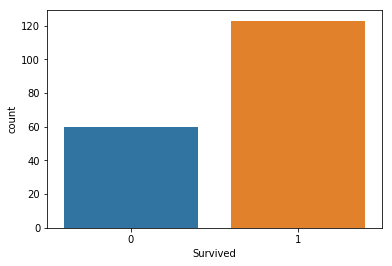

In [53]:
sns.countplot(train_df.Survived, label='Count')

Text(0,0.5,'Gender')

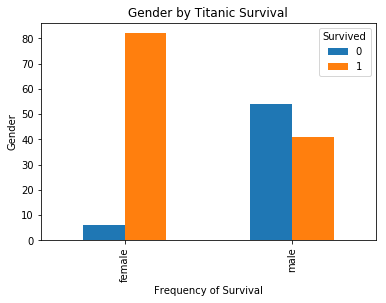

In [54]:
pd.crosstab(train_df.Sex, train_df.Survived).plot(kind='bar')
plt.title('Gender by Titanic Survival')
plt.xlabel('Frequency of Survival')
plt.ylabel('Gender')

Text(0,0.5,'Porportion of Survival')

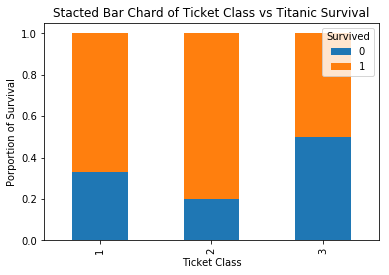

In [55]:
table = pd.crosstab(train_df.Pclass, train_df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacted Bar Chard of Ticket Class vs Titanic Survival')
plt.xlabel('Ticket Class')
plt.ylabel('Porportion of Survival')

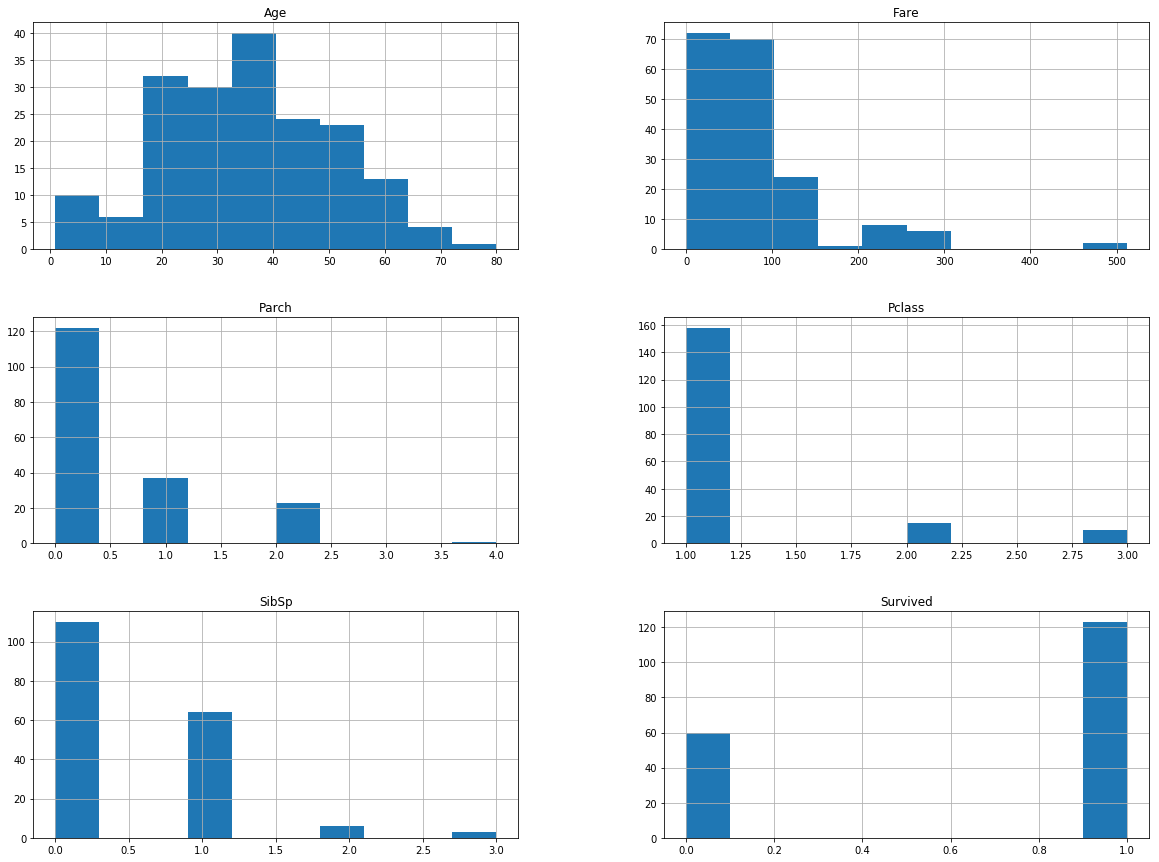

In [56]:
num_bins=10
train_df.hist(bins=num_bins, figsize=(20,15))
plt.show()

### Creat dummy Variables for categorical variables

There are a 5 categorical (viz. object) variables in the training dataset and they need to be converted to dummy variables before they can be used for modelling. However, when looking more closely, there are really one 3 potential variable that we would even consider for in feature selections, which are Sex, Cabin and Embarked. The others are really strings text and most likely would not be highly coorelated to predicting survival. We can keep a note here in case our accuracy or optimization cases needs to be more enhanced. 

In [57]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
Survived    183 non-null int64
Pclass      183 non-null int64
Name        183 non-null object
Sex         183 non-null object
Age         183 non-null float64
SibSp       183 non-null int64
Parch       183 non-null int64
Ticket      183 non-null object
Fare        183 non-null float64
Cabin       183 non-null object
Embarked    183 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 22.2+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [58]:
cat_vars = ['Sex', 'Embarked']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(train_df[var], prefix=var)
    train1 = train_df.join(cat_list)
    train_df = train1

In [59]:
# remove the actual categorical valriables once dummy variable have been created
train_df.drop(['Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [60]:
train_df.columns.values

array(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [61]:
train_vars = train_df.columns.values.tolist()
y=['Survived']
X=[i for i in train_vars if i not in y]

In [62]:
X

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

## Feature Enginnering and Selection

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(train_df[X], train_df[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


/home/redne/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
cols = ['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

X=train_df[cols]
y=train_df['Survived']

### Logistic Regression Model

__Logistic Regressoin__ is a simple, linear classifier. It takes a weighted combination of the input features, and passes it through a sigmoid function. A sigmoid function smoothly maps any real number to a number between 0 and 1. 

In [66]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/redne/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.745


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.764


### Support Vector Machine

In [74]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
print('Support Vector Machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support Vector Machine accuracy: 0.745


it appears that Random Forest had the best accuracy, however, lets evaluate the model performance using the sklearn classification report

### Precision and recall

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.50      0.46      0.48        13
          1       0.84      0.86      0.85        42

avg / total       0.76      0.76      0.76        55



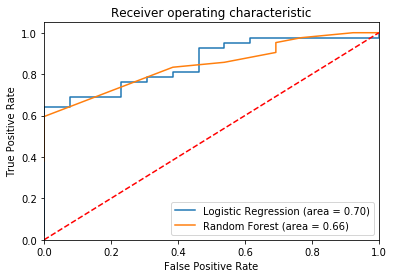

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')